In [57]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [58]:
import db

In [59]:
%sql sqlite:///schema/test.db

u'Connected: None@schema/test.db'

In [60]:
import matplotlib.pyplot as plt
%matplotlib notebook
cur_experiment_id = 2

In [61]:
result = %sql select data from mic where experiment_id = :cur_experiment_id
mic_1 = result[0][0]
mic_2 = result[1][0]

print len(mic_1), len(mic_2)

Done.
2796272 2796272


<IPython.core.display.Javascript object>


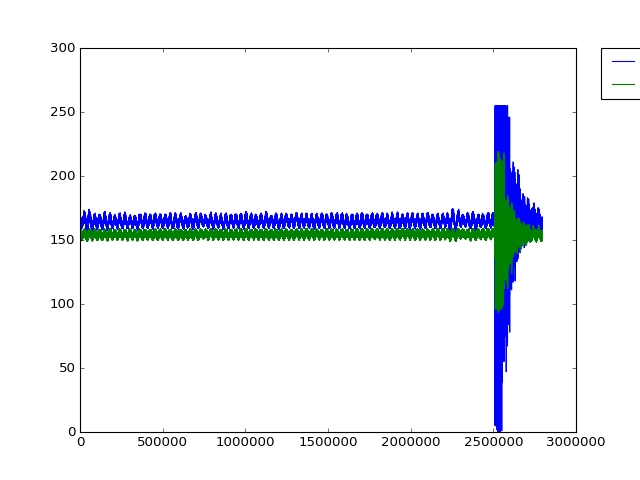

In [62]:
import matplotlib.pyplot as plt
plt.plot(mic_1, label='Mic 1')
plt.plot(mic_2, label='Mic 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [63]:
result = %sql select * from experiment
print result

result = %sql select experiment_id, array_id, mic_id, delay from mic

print result

Done.
+----+------------+-----+-----+
| id |  datetime  |  x  |  y  |
+----+------------+-----+-----+
| 1  | 1486590189 | 1.0 | 2.0 |
| 2  | 1486590264 | 2.0 | 1.0 |
+----+------------+-----+-----+
Done.
+---------------+----------+--------+------------+
| experiment_id | array_id | mic_id |   delay    |
+---------------+----------+--------+------------+
|       2       |    0     |   0    |    0.0     |
|       2       |    0     |   1    |   -558.0   |
|       2       |    0     |   2    | -2796191.0 |
+---------------+----------+--------+------------+
